<a href="https://colab.research.google.com/github/konaanitha/CodelabsIT496/blob/main/Anithak_RadarPlot_A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import math
df = pd.read_csv('/content/drive/MyDrive/IT496/priority.csv')
print(df)

                Criteria  weight  ratingA  ratingB  scoreA  scoreB
0          Profitability    0.15        5      3.5     NaN     NaN
1  Improved Productivity    0.15        4      3.0     NaN     NaN
2           Cost savings    0.15        7      6.0     NaN     NaN
3    Investment Required    0.10        3      5.0     NaN     NaN
4      Risk to Customers    0.15        5      2.0     NaN     NaN
5        Risk to Revenue    0.10        6      4.0     NaN     NaN
6   Risk to Organization    0.20        7      5.0     NaN     NaN


In [3]:
df.index = df['Criteria']
#print(df)

for index, row in df.iterrows():
  df['scoreA'][index] = row['ratingA'] * row['weight']
  df['scoreB'][index] = row['ratingB'] * row['weight']

print(df)


                                    Criteria  weight  ratingA  ratingB  \
Criteria                                                                 
Profitability                  Profitability    0.15        5      3.5   
Improved Productivity  Improved Productivity    0.15        4      3.0   
Cost savings                    Cost savings    0.15        7      6.0   
Investment Required      Investment Required    0.10        3      5.0   
Risk to Customers          Risk to Customers    0.15        5      2.0   
Risk to Revenue              Risk to Revenue    0.10        6      4.0   
Risk to Organization    Risk to Organization    0.20        7      5.0   

                       scoreA  scoreB  
Criteria                               
Profitability            0.75   0.525  
Improved Productivity    0.60   0.450  
Cost savings             1.05   0.900  
Investment Required      0.30   0.500  
Risk to Customers        0.75   0.300  
Risk to Revenue          0.60   0.400  
Risk to Organ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
totalScoreA = 0
totalScoreB = 0

for index, row in df.iterrows():
  totalScoreA += row['scoreA']
  totalScoreB += row['scoreB']

print('the total score of A is {:.2f} and for B is {:.2f}'.format(totalScoreA, totalScoreB))

the total score of A is 5.45 and for B is 4.07


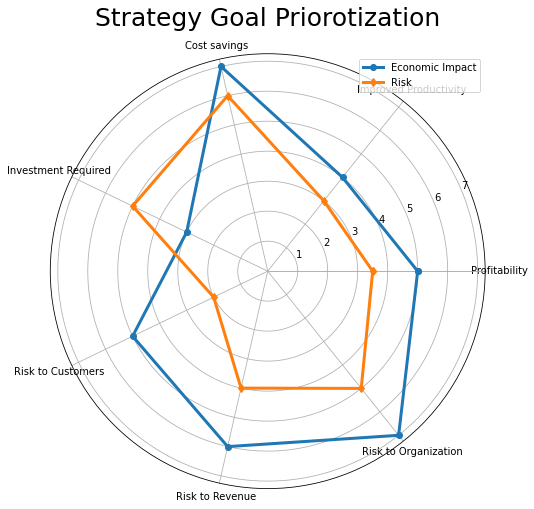

In [7]:
import numpy as np
import matplotlib.pyplot as plt

axisLocations = np.linspace(start=0, stop=2*np.pi,num=len(df['ratingA']),endpoint=False)
axisLocations = np.concatenate((axisLocations,[axisLocations[0]]))
ratingsA = df['ratingA']
ratingsB = df['ratingB']

ratingsACircular = np.concatenate((ratingsA,[ratingsA[0]]))
ratingsBCircular = np.concatenate((ratingsB,[ratingsB[0]]))

plt.figure(figsize=(8,8))
plt.subplot(polar = True)

plt.plot(axisLocations,ratingsACircular,'o-', linewidth=3, label='Economic Impact')
plt.plot(axisLocations,ratingsBCircular,'d-', linewidth=3, label='Risk')

plt.title('Strategy Goal Priorotization', size = 25)
lines , labels = plt.thetagrids(np.degrees(axisLocations), labels= df['Criteria'])
plt.legend()
plt.show()